In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

sns.set(style="whitegrid")

In [4]:
df = pd.read_csv("/content/clustered_products.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ProductID            12491 non-null  int64 
 1   ProductName          12491 non-null  object
 2   ProductBrand         12491 non-null  object
 3   Gender               12491 non-null  object
 4   Price (INR)          12491 non-null  int64 
 5   NumImages            12491 non-null  int64 
 6   Description          12491 non-null  object
 7   PrimaryColor         11597 non-null  object
 8   Cluster_Description  12491 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 878.4+ KB


,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor,Cluster_Description
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black,2
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige,2
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink,0
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue,0
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White,3


cluster: 0
ProductBrand
Indian Terrain    204
Roadster          155
Flying Machine    109
Pepe Jeans         94
WROGN              47
                 ... 
Alena               1
Canary London       1
Invincible          1
Arrow               1
ESPRIT              1
Name: count, Length: 116, dtype: int64


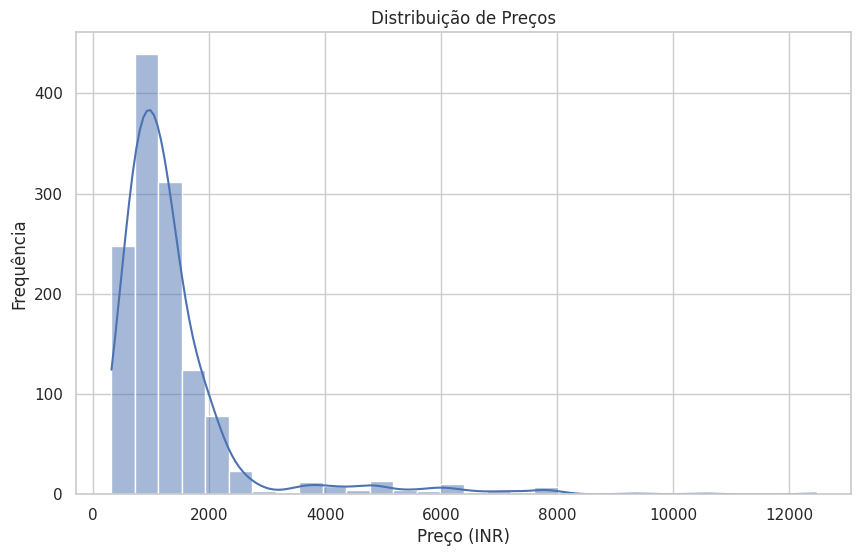

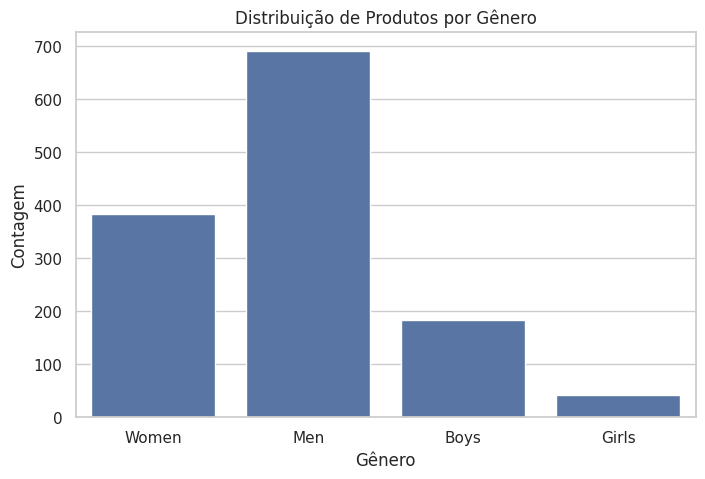

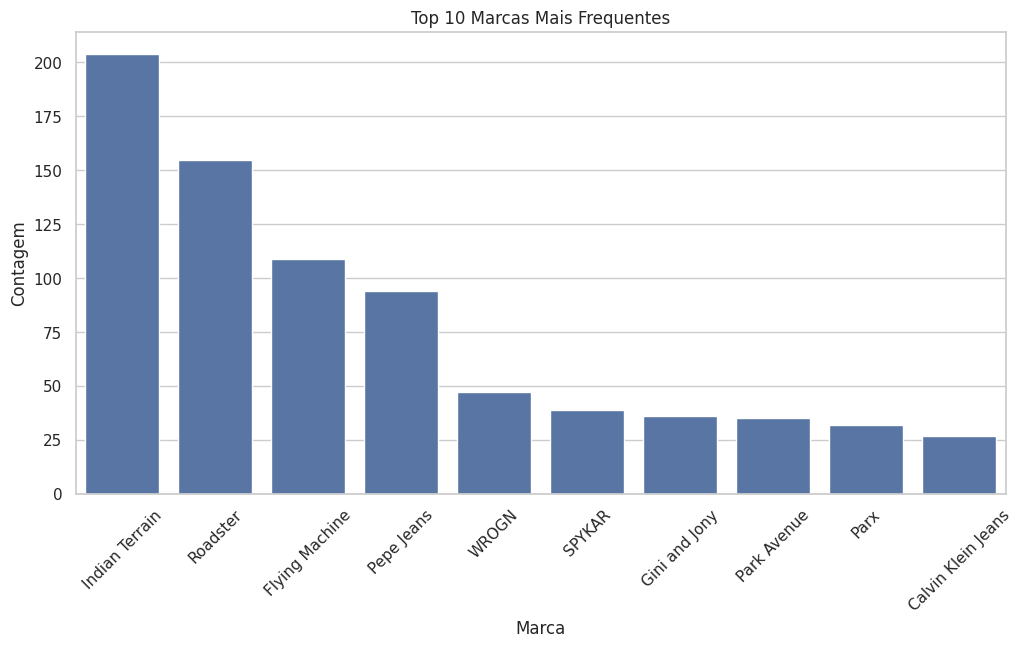

cluster: 1
ProductBrand
Indian Terrain                  278
AURELIA                         215
U.S. Polo Assn. Kids            206
W                               206
Pepe Jeans                      165
                               ... 
Johnny Bravo by Kook N Keech      1
CUTECUMBER                        1
Iti                               1
Forca by Lifestyle                1
Stupid Cupid                      1
Name: count, Length: 296, dtype: int64


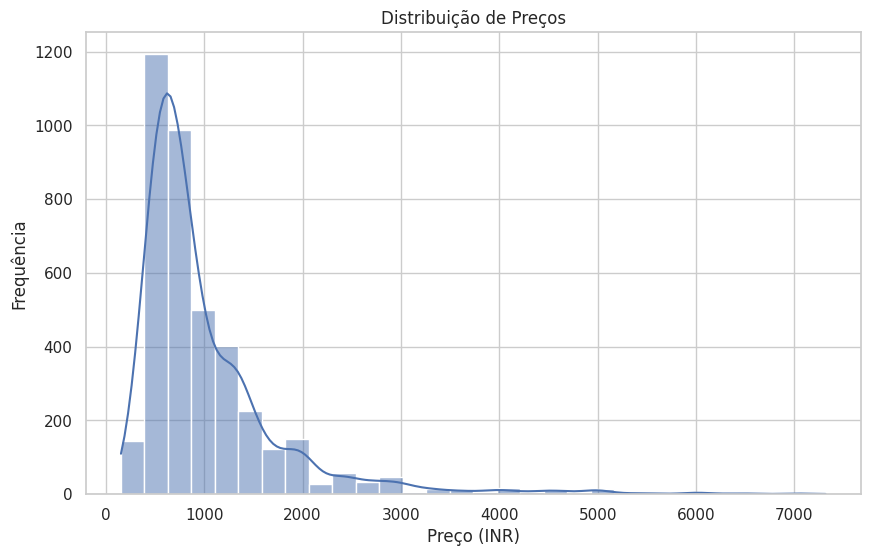

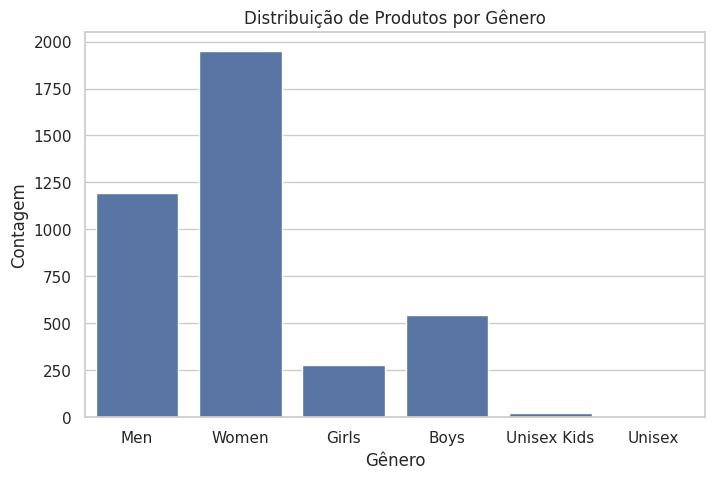

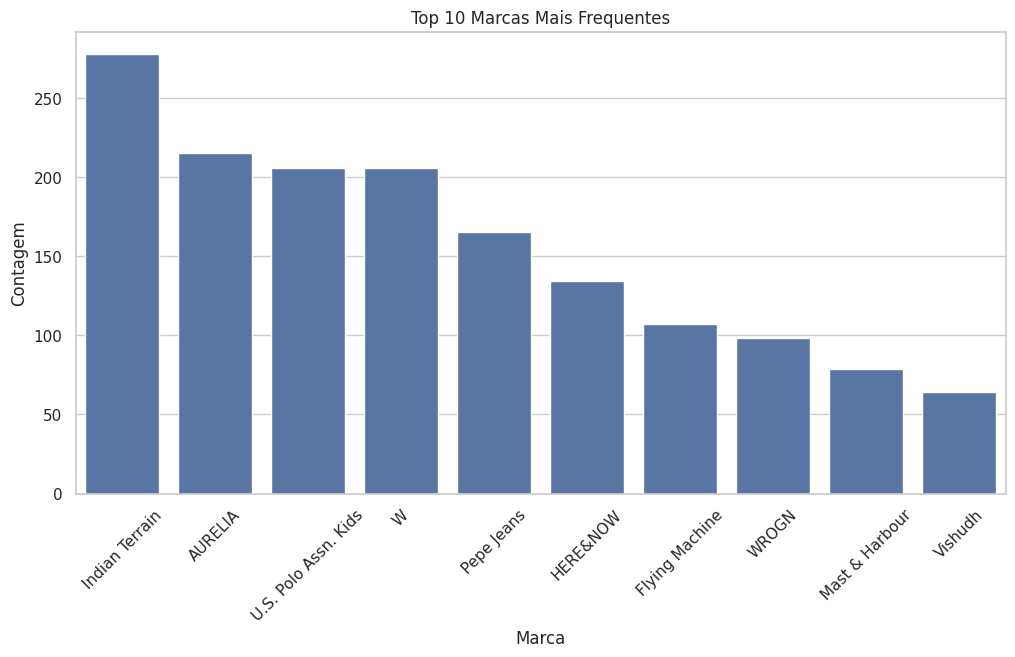

cluster: 2
ProductBrand
Puma         336
GAP          201
Cortina      134
Lavie        121
Titan        107
            ... 
Lotto          1
Aerosoles      1
Zippo          1
Fourwalls      1
Carven         1
Name: count, Length: 473, dtype: int64


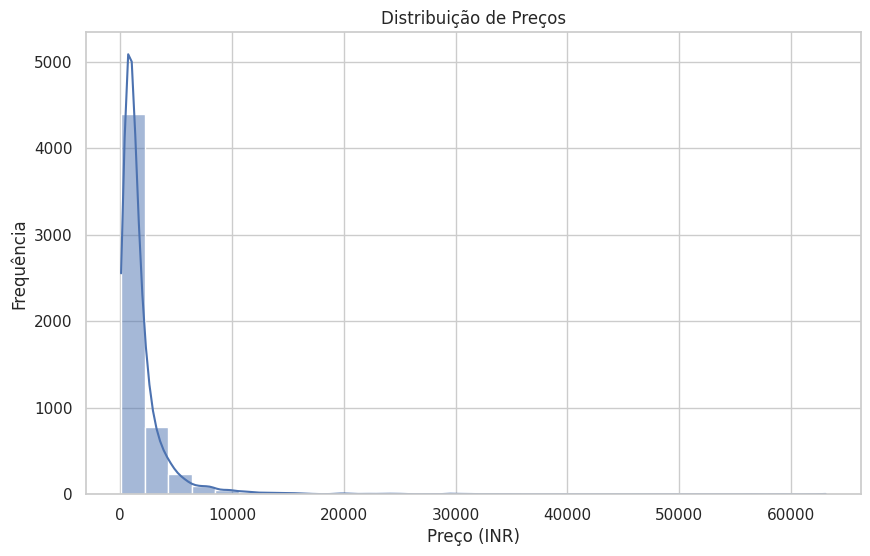

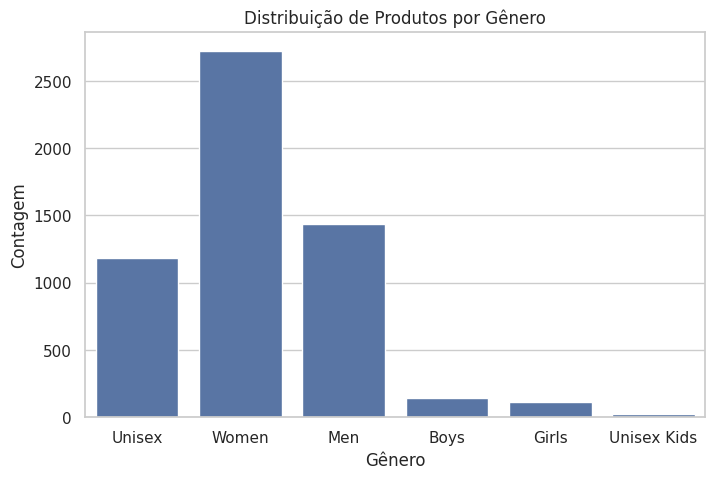

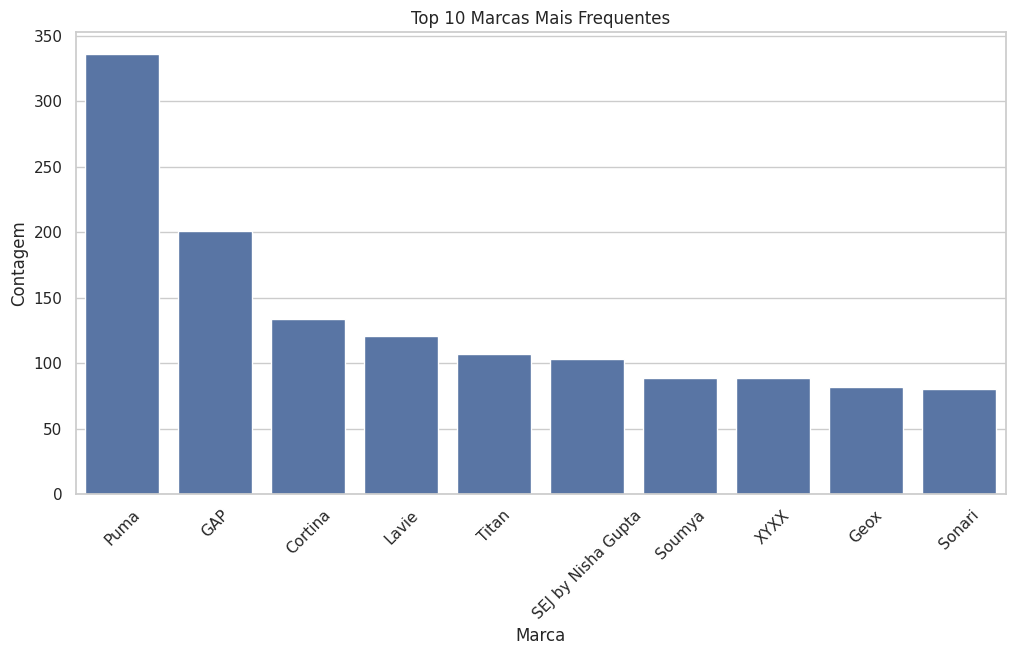

cluster: 3
ProductBrand
Indian Terrain               475
Next Look                     91
Park Avenue                   83
Parx                          81
Flying Machine                75
                            ... 
Solemio                        1
U.S. Polo Assn. Denim Co.      1
V Dot                          1
Yellow Jeans                   1
Kraus Jeans                    1
Name: count, Length: 104, dtype: int64


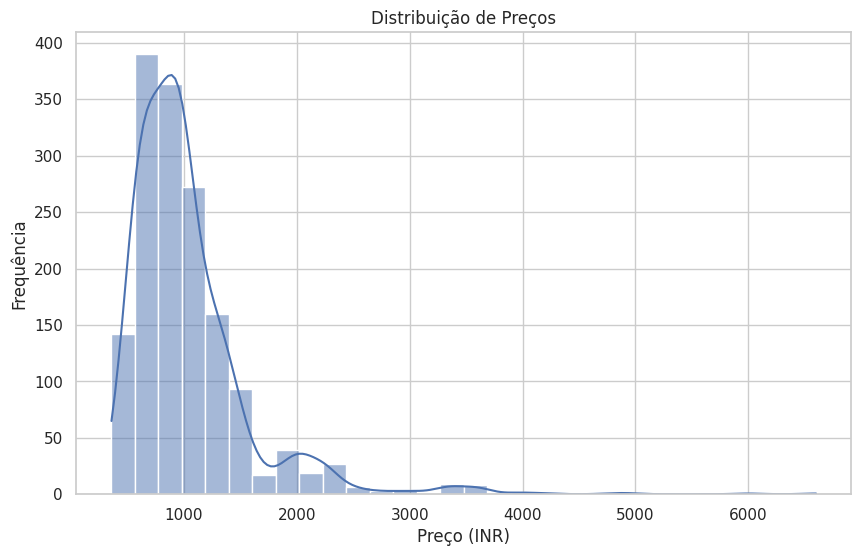

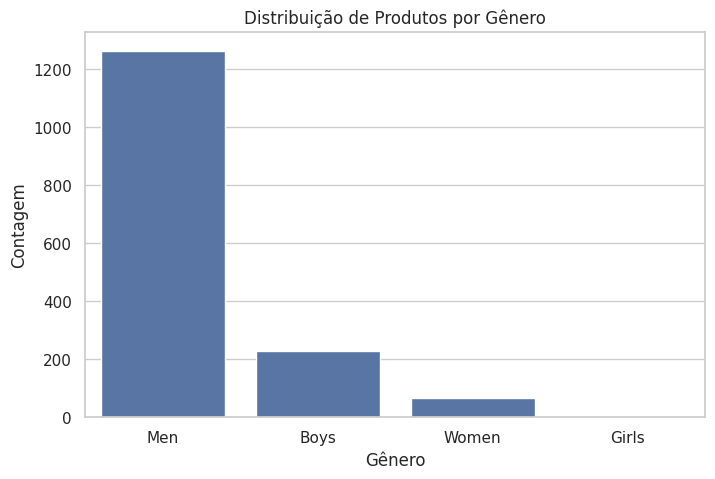

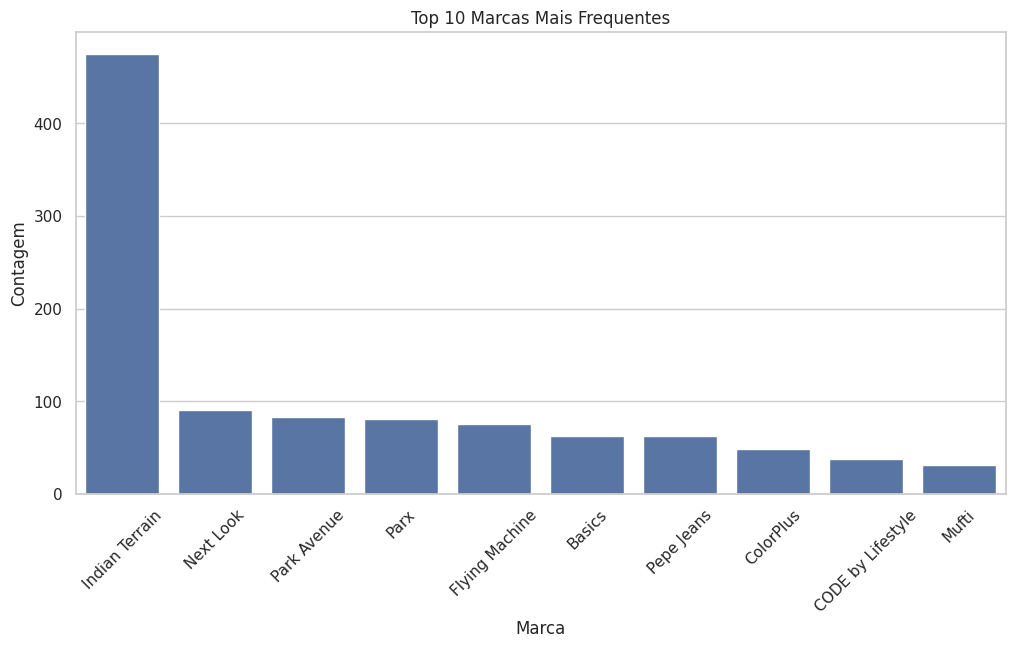

In [5]:
for cluster in range(4):
  dfc=df[df['Cluster_Description']==cluster]
  print(f'cluster: {cluster}')
  print(dfc['ProductBrand'].value_counts())
  # Distribuição dos preços
  plt.figure(figsize=(10, 6))
  sns.histplot(dfc['Price (INR)'], bins=30, kde=True)
  plt.title("Distribuição de Preços")
  plt.xlabel("Preço (INR)")
  plt.ylabel("Frequência")
  plt.show()

  # Produtos por gênero
  plt.figure(figsize=(8, 5))
  sns.countplot(x='Gender', data=dfc)
  plt.title("Distribuição de Produtos por Gênero")
  plt.xlabel("Gênero")
  plt.ylabel("Contagem")
  plt.show()

  # Marcas mais frequentes
  plt.figure(figsize=(12, 6))
  top_brands = dfc['ProductBrand'].value_counts().nlargest(10)
  sns.barplot(x=top_brands.index, y=top_brands.values)
  plt.title("Top 10 Marcas Mais Frequentes")
  plt.xlabel("Marca")
  plt.ylabel("Contagem")
  plt.xticks(rotation=45)
  plt.show()

#Resumo Geral dos Clusters
#Cluster 0
Marcas Principais: Indian Terrain, Roadster, Flying Machine, Pepe Jeans.

Distribuição por Gênero: Maioria dos produtos para homens, seguido por mulheres e crianças, com produtos masculinos predominando.

Preços: Não especificados, mas há uma diversidade nas marcas representadas, sugerindo uma variedade de faixas de preço.

#Cluster 1
Marcas Principais: Indian Terrain, AURELIA, U.S. Polo Assn. Kids, W, Pepe Jeans.

Distribuição por Gênero: Maioria dos produtos para mulheres, seguido por homens e crianças, com uma quantidade significativa de produtos unissex para crianças.

Preços: Concentrados em faixas mais baixas, com algumas exceções de produtos mais caros.

#Cluster 2
Marcas Principais: Puma, GAP, Cortina, Lavie, Titan.

Distribuição por Gênero: Predominância de produtos para mulheres e homens, com uma quantidade considerável de produtos unissex e uma representação menor de produtos infantis.

Preços: Concentração em faixas mais baixas, com uma longa cauda indicando alguns produtos de preço mais elevado.

#Cluster 3
Marcas Principais: Indian Terrain, Next Look, Park Avenue, Parx, Flying Machine.

Distribuição por Gênero: Maioria dos produtos para homens, seguido por mulheres e uma quantidade significativa de produtos unissex. Produtos infantis são menos representados.

Preços: Distribuição uniforme sem grandes picos, sugerindo consistência nos preços.

#Conclusão
Diversidade de Marcas: Indian Terrain é uma marca constante em vários clusters, mostrando sua popularidade. Outras marcas como Puma e GAP também aparecem frequentemente, mas em clusters específicos.

Distribuição por Gênero: Há uma clara predominância de produtos para homens e mulheres em todos os clusters, com produtos infantis sendo menos representados. Produtos unissex também aparecem, mas variam entre os clusters.

Preços: A maioria dos produtos está concentrada em faixas de preços mais baixas, com algumas exceções de produtos mais caros, especialmente no Cluster 2.